In [1]:
# mounted the google drive with google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# import the required librarry
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from PIL import Image
from keras.utils.vis_utils import plot_model
from imutils import paths
from matplotlib import image
import os
import time
import cv2
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, Dense, Flatten
from google.colab.patches import cv2_imshow
from PIL import Image

In [3]:
# read the images using paths library and paths is converted in the list
image_path = list(paths.list_images('/content/drive/MyDrive/Imagedataset_colorization'))
print(image_path[:30])

['/content/drive/MyDrive/Imagedataset_colorization/image1104.jpg', '/content/drive/MyDrive/Imagedataset_colorization/image0955.jpg', '/content/drive/MyDrive/Imagedataset_colorization/image1233.jpg', '/content/drive/MyDrive/Imagedataset_colorization/image1229.jpg', '/content/drive/MyDrive/Imagedataset_colorization/image1083.jpg', '/content/drive/MyDrive/Imagedataset_colorization/image1008.jpg', '/content/drive/MyDrive/Imagedataset_colorization/image0970.jpg', '/content/drive/MyDrive/Imagedataset_colorization/image1186.jpg', '/content/drive/MyDrive/Imagedataset_colorization/image1241.jpg', '/content/drive/MyDrive/Imagedataset_colorization/image0945.jpg', '/content/drive/MyDrive/Imagedataset_colorization/image1213.jpg', '/content/drive/MyDrive/Imagedataset_colorization/image1075.jpg', '/content/drive/MyDrive/Imagedataset_colorization/image0888.jpg', '/content/drive/MyDrive/Imagedataset_colorization/image0961.jpg', '/content/drive/MyDrive/Imagedataset_colorization/image0981.jpg', '/content

In [4]:
Gray_images =[]
Colored_images= []
 
for imgPath in image_path[:2000]:
  #rgb_image = Image.open(imgPath)
  rgb_image = cv2.imread(imgPath[:390])
  rgb_image1 = cv2.resize(rgb_image, (256,256))
  #plt.imshow(rgb_image1)
  rgb_img_array = (np.asarray(rgb_image1))/255
  #print(rgb_img_array.shape)
  gray_image = cv2.cvtColor(rgb_image1, cv2.COLOR_BGR2GRAY)
  gray_img_array = (np.asarray(gray_image))/255
  #print(gray_image.shape)
  #plt.imshow(gray_image)
  Gray_images.append(gray_img_array)
  Colored_images.append(rgb_img_array)

In [5]:
# split the dataset into train and test samples
#x_train,x_test, y_train, y_test = train_test_split(np.array(Gray_images), np.array(Colored_images), test_size =0.1, random_state=21)
x_train = np.array(Gray_images)
y_train = np.array(Colored_images)

In [6]:
# print the shape of training samples
print("Shape of training samples: ", x_train.shape)
print(x_train)

Shape of training samples:  (2000, 256, 256)
[[[0.46666667 0.53333333 0.4627451  ... 0.3372549  0.30196078 0.15294118]
  [0.73333333 0.5254902  0.38039216 ... 0.32941176 0.17254902 0.25098039]
  [0.68627451 0.78431373 0.61176471 ... 0.32156863 0.18823529 0.40784314]
  ...
  [0.47058824 0.45882353 0.63529412 ... 0.04705882 0.04705882 0.05882353]
  [0.4745098  0.40392157 0.60784314 ... 0.03529412 0.10980392 0.04705882]
  [0.41568627 0.40784314 0.4        ... 0.03921569 0.09019608 0.01176471]]

 [[0.27843137 0.27843137 0.29019608 ... 0.25098039 0.25882353 0.28627451]
  [0.29019608 0.30196078 0.31764706 ... 0.25490196 0.2627451  0.27058824]
  [0.28235294 0.29019608 0.29803922 ... 0.26666667 0.2745098  0.25882353]
  ...
  [0.56862745 0.57254902 0.54117647 ... 0.39607843 0.38823529 0.37647059]
  [0.58039216 0.57647059 0.55686275 ... 0.37254902 0.38039216 0.39215686]
  [0.61960784 0.60784314 0.6        ... 0.38039216 0.38823529 0.4       ]]

 [[0.45490196 0.49803922 0.49411765 ... 0.2745098  

In [7]:
# print the shape of testing samples
print("Shape of target output: ", x_test.shape)
print(y_train)

NameError: ignored

In [ ]:
# print number of training and testing samples sample
print("Number of training sample:", len(x_train))
print("Number of testing sample:", len(x_test))

In [8]:
  # Create Autoencoder model for colorization of gray image  
  Img_size = 256
  inputs = tf.keras.layers.Input(shape=(Img_size, Img_size,1))
  conv1 = tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=1)(inputs)
  conv1 = tf.keras.layers.LeakyReLU(alpha=0.35)(conv1)
  conv1 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=1)(conv1)
  conv1 = tf.keras.layers.LeakyReLU(alpha=0.35)(conv1)
  conv1 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=1)(conv1)
  conv1 = tf.keras.layers.LeakyReLU(alpha=0.35)(conv1)

  conv2 = tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), strides=1)(conv1)
  conv2 = tf.keras.layers.LeakyReLU(alpha=0.35)(conv2)
  conv2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=1)(conv2)
  conv2 = tf.keras.layers.LeakyReLU(alpha=0.35)(conv2)
  conv2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=1)(conv2)
  conv2 = tf.keras.layers.LeakyReLU(alpha=0.35)(conv2)

  conv3 = tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), strides=1)(conv2)
  conv3 = tf.keras.layers.LeakyReLU(alpha=0.35)(conv3)
  conv3 = tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=1)(conv3)
  conv3 = tf.keras.layers.LeakyReLU(alpha=0.35)(conv3)
  conv3 = tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=1)(conv3)
  conv3 = tf.keras.layers.LeakyReLU(alpha=0.35)(conv3)

  bottleneck = tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=1, activation='tanh', padding="same")(conv3)

  concat_1 = tf.keras.layers.concatenate([bottleneck,conv3], axis=3)

  conv_up3 = tf.keras.layers.Conv2DTranspose(filters=128, kernel_size=(3,3), strides=1, activation='relu')(concat_1)
  conv_up3 = tf.keras.layers.Conv2DTranspose(filters=128, kernel_size=(3,3), strides=1, activation='relu')(conv_up3)
  conv_up3 = tf.keras.layers.Conv2DTranspose(filters=64, kernel_size=(5,5), strides=1, activation='relu')(conv_up3)

  concat_2 = tf.keras.layers.concatenate([conv_up3, conv2], axis=3)
  conv_up2 = tf.keras.layers.Conv2DTranspose(filters=64, kernel_size=(3,3), strides=1, activation='relu')(concat_2)
  conv_up2 = tf.keras.layers.Conv2DTranspose(filters=64, kernel_size=(3,3), strides=1, activation='relu')(conv_up2)
  conv_up2 = tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=(5,5), strides=1, activation='relu')(conv_up2)
 
  concat_3 = tf.keras.layers.concatenate([conv_up2, conv1], axis=3)
  conv_up1 = tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=(3,3), strides=1, activation='relu')(concat_3)
  conv_up1 = tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=(3,3), strides=1, activation='relu')(conv_up1)
  conv_up1 = tf.keras.layers.Conv2DTranspose(filters=3, kernel_size=(5,5), strides=1, activation='relu')(conv_up1)

  AutoEncoder_model = tf.keras.models.Model(inputs,conv_up1)



In [9]:
# assigning of the optimizer and loss function
AutoEncoder_model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [10]:
# model summary
AutoEncoder_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 252, 252, 16) 416         input_1[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 252, 252, 16) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 250, 250, 32) 4640        leaky_re_lu[0][0]                
______________________________________________________________________________________________

In [11]:
# fit the autoencoder model
AutoEncoder_model.fit(x_train, y_train,epochs=40, batch_size=15, steps_per_epoch=25) #validation_data=(x_test, y_test))

Epoch 1/40
25/25 [==============================] - 145s 3s/step - loss: 3.2919 - accuracy: 0.3087
Epoch 2/40
25/25 [==============================] - 83s 3s/step - loss: 0.0263 - accuracy: 0.3647
Epoch 3/40
25/25 [==============================] - 83s 3s/step - loss: 0.0214 - accuracy: 0.3928
Epoch 4/40
25/25 [==============================] - 83s 3s/step - loss: 0.0172 - accuracy: 0.3893
Epoch 5/40
25/25 [==============================] - 83s 3s/step - loss: 0.0143 - accuracy: 0.4216
Epoch 6/40
25/25 [==============================] - 96s 4s/step - loss: 0.0127 - accuracy: 0.4280
Epoch 7/40
25/25 [==============================] - 83s 3s/step - loss: 0.0125 - accuracy: 0.4131
Epoch 8/40
25/25 [==============================] - 83s 3s/step - loss: 0.0122 - accuracy: 0.4121
Epoch 9/40
25/25 [==============================] - 83s 3s/step - loss: 0.0112 - accuracy: 0.4180
Epoch 10/40
25/25 [==============================] - 83s 3s/step - loss: 0.0105 - accuracy: 0.4232
Epoch 11/40
25/25 

In [12]:
# import the gray image for rgb image generation 
def Put_image_path(path):
  img = cv2.imread(path,0)
  img1 = cv2.resize(img, (256,256))
  return img1


In [13]:
# function for generating RGB images
def get_colored_image(gray_image):
  gray_img_array = (np.asarray(gray_image))/255
  gray_img_array.resize(1,256,256,1)
  gray_img_array.shape
  predicted_image = AutoEncoder_model.predict(gray_img_array)
  rgb_img = predicted_image.reshape(256,256,3)
  rgb_img = rgb_img*255
  return rgb_img 

In [14]:
# enter the Gray image path
gray_img1 = Put_image_path('/content/drive/MyDrive/Imagedataset_colorization/image1233.jpg')

# print the array of gray image
print(gray_img1)


[[116 127 126 ...  70  70  68]
 [117 129 128 ...  72  71  69]
 [120 130 130 ...  72  72  70]
 ...
 [ 72  74  78 ... 124 122 113]
 [ 72  72  74 ... 118 119 117]
 [ 67  67  69 ... 118 115 107]]


In [15]:
# generate the RGB image using Autoencoder

colored_image_array = get_colored_image(gray_img1)

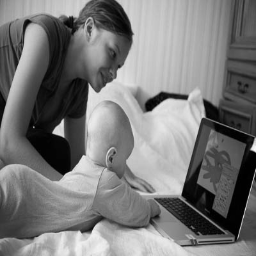

In [16]:
# first gray test sample 
cv2_imshow(gray_img1)

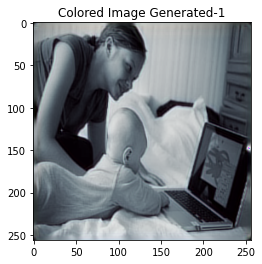

In [17]:
#  first RGB generated image
rgb= np.array(colored_image_array, dtype=np.uint8)
img = Image.fromarray(rgb)
plt.title("Colored Image Generated-1")
plt.imshow(img)

In [18]:
# second gray test sample image
gray_img2 = Put_image_path('/content/drive/MyDrive/Imagedataset_colorization/image0650.jpg')
colored_image_array2 = get_colored_image(gray_img2)

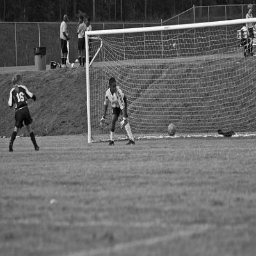

In [19]:
cv2_imshow(gray_img2)

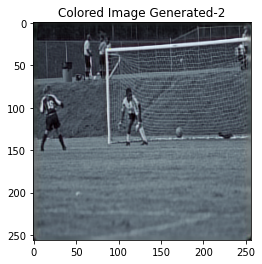

In [20]:
# generated RGB image-2
rgb= np.array(colored_image_array2, dtype=np.uint8)
img = Image.fromarray(rgb)
plt.title("Colored Image Generated-2")
plt.imshow(img)

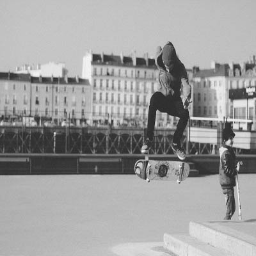

In [21]:
# third test image
gray_img3 = Put_image_path('/content/drive/MyDrive/Imagedataset_colorization/image0920.jpg')
colored_image_array3 = get_colored_image(gray_img3)
cv2_imshow(gray_img3)

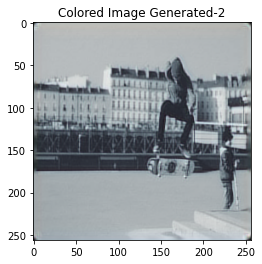

In [22]:
# RGB generated image
rgb= np.array(colored_image_array3, dtype=np.uint8)
img = Image.fromarray(rgb)
plt.title("Colored Image Generated-2")
plt.imshow(img)